In [159]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout

In [160]:
df = pd.read_csv(r"C:\Users\sanja\Desktop\RNN-Spam\spam (1).csv", encoding="latin1")

In [161]:
df.shape

(5572, 5)

In [162]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [163]:
df.duplicated().sum()

np.int64(403)

In [164]:
df.drop_duplicates(inplace=True)

In [165]:
df.shape

(5169, 5)

In [166]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [167]:
df = df[['v1','v2']]
df.columns = ['label', 'text']

In [168]:
df['label'].value_counts()

label
ham     4516
spam     653
Name: count, dtype: int64

In [169]:
df['label']=df['label'].map({'ham':0, 'spam':1})
texts=df['text'].values
labels=df['label'].values

In [170]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)

In [171]:
sequences=tokenizer.texts_to_sequences(texts)
word_index=tokenizer.word_index
vocab_size=len(word_index)+1

In [172]:
max_len=max(len(s) for s in sequences)
X=pad_sequences(sequences, maxlen=max_len, padding='post')

In [173]:
y=np.array(labels)

In [174]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [175]:
from sklearn.utils.class_weight import compute_class_weight
classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weight_dict = dict(zip(classes, class_weights))
print("Class Weights:", class_weight_dict)

Class Weights: {np.int64(0): np.float64(0.5700303280948442), np.int64(1): np.float64(4.06988188976378)}


In [176]:
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=16, input_length=max_len),
    Dropout(0.3),                # Drop 30% of embeddings
    SimpleRNN(16, dropout=0.2),  # Drop 20% of recurrent connections
    Dropout(0.3),                # Drop 30% after RNN output
    Dense(1, activation='sigmoid')
])


c:\Users\sanja\Desktop\RNN-Spam\myvenvs\lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [177]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [178]:
history=model.fit(
    X_train,
    y_train,
    epochs=35,
    validation_data=(X_test, y_test),
    verbose=1,
    class_weight=class_weight_dict
)


Epoch 1/35
130/130 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.6871 - loss: 0.7158 - val_accuracy: 0.1402 - val_loss: 0.7321
Epoch 2/35
130/130 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5168 - loss: 0.6957 - val_accuracy: 0.8598 - val_loss: 0.6402
Epoch 3/35
130/130 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.5400 - loss: 0.6995 - val_accuracy: 0.8598 - val_loss: 0.6369
Epoch 4/35
130/130 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.4880 - loss: 0.6952 - val_accuracy: 0.8598 - val_loss: 0.6786
Epoch 5/35
130/130 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.6571 - loss: 0.6585 - val_accuracy: 0.8182 - val_loss: 0.5503
Epoch 6/35
130/130 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.8638 - loss: 0.4225 - val_accuracy: 0.9197 - val_loss: 0.3083
Epoch 7/35
130/130 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9444 - loss: 0.2488 - val_accuracy: 0.7863 - val_loss: 0.5771
Epoch 8/35
130/130 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9468 - loss: 0.2082 - val_accu

In [179]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy*100:.2f}%")


Test Accuracy: 96.81%


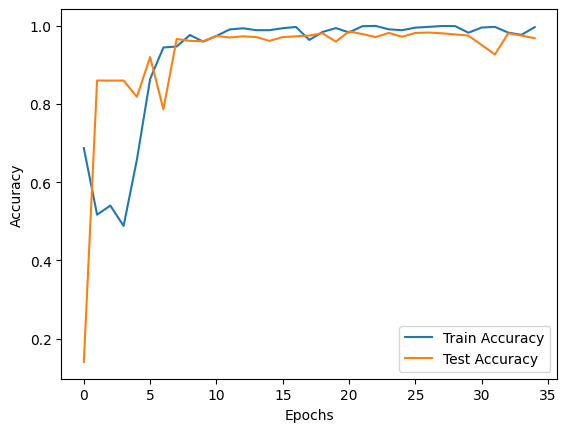

In [180]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [181]:
# Save model
model.save("spam_rnn_model.h5")
print("✅ Model saved as spam_rnn_model.h5")


✅ Model saved as spam_rnn_model.h5


In [182]:
import pickle
with open("max_len.pkl", "wb") as f:
    pickle.dump(max_len, f)


In [183]:
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)
print("Tokenizer saved!")


Tokenizer saved!
